># <center> <font color='red'> CMPE428 - DATA SCIENCE </font> </center>
>## <center> <font color='blue'> Assignment 4 - Linear Regression [SOLUTION]</font>  </center>

In [1]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Consider the Life Expectancy dataset. The life expectancy (dependent variable, in column D) is going to be predicted using the attributes in columns E to V (independent variables, predictors). 

Read the dataset into the variable df

In [17]:
df = pd.read_csv('/home/jay/Downloads/archive/Life_Expectancy_ Data.csv')

Display the top 10 rows of the dataset

In [18]:
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


Discard the First three columns of the dataset

In [19]:
df = df.iloc[:, 3:]

Display the names of the dependent variables

In [20]:
df.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Count and report the number of missing values in each variable (including both the dependent and independent variables)

In [21]:
print("Missing Values per Variable:")
print(df.isnull().sum())


Missing Values per Variable:
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


Impute the missing values in by their most mean values. All variables are numerical.

In [22]:
for col in list(df.columns):
    df[col] = df[col].fillna(df[col].mean())


Provide a correlation plot for the variables in the dataset, including the dependent variable. Comment on the strengths on the predictors. Comment on the correlations between predictors.

<Axes: >

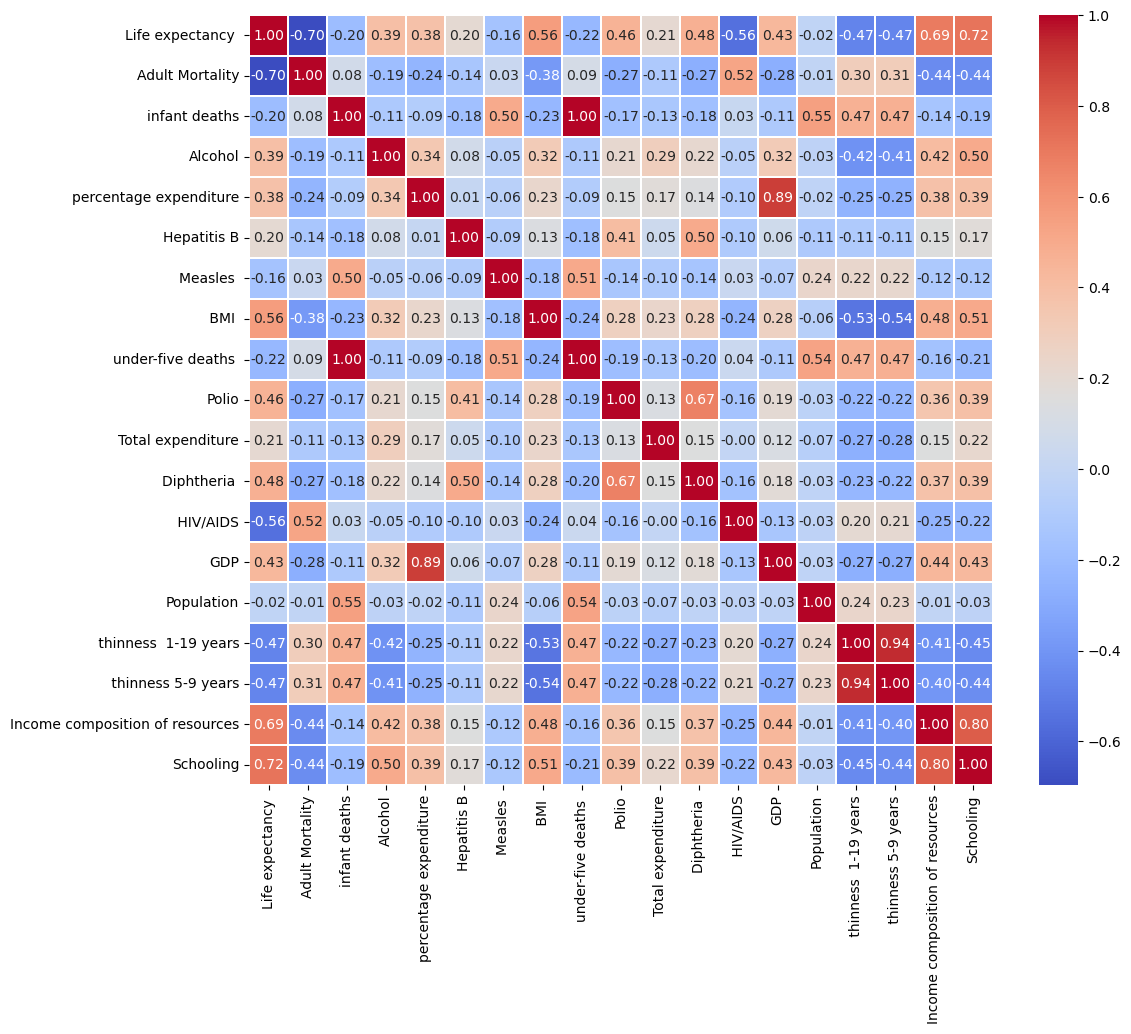

In [23]:
cormat = df.corr()
f,ax = plt.subplots(figsize = (12,10))
sns.heatmap(cormat, ax = ax, cmap = 'coolwarm', linewidth = 0.1, annot = True, fmt = '.2f')


After adding a constant column to the dataset, determine which independent variable is the most related with the dependent variable by developing a linear regression model between the dependent variable and each independent variable (include the const column as well). Rank the predictors according to the Adjusted R2 values of the linear models obtained. 

HINT: Form a dictionary (named as RsqrDict) where each item is the name of the predictor and the value is the corresponding Adjusted R2 value. Then sort according the the values using <RsqrDict_Sorted = sorted(RsqrDict, key=RsqrDict.get, reverse = True)>

In [31]:
import statsmodels.api as sm
data = sm.add_constant(df)
indPredictors = list(data.columns)
# print(indPredictors)
indPredictors.remove('const')
if 'LifeExpectancy' in indPredictors:
    indPredictors.remove('LifeExpectancy')
print(indPredictors)
RsqrDict = {}

for variable in indPredictors:
    model = sm.OLS(df['Life expectancy '], data[[variable]]).fit()
    RsqrDict[variable] = model.rsquared_adj
    
print("Adjusted Values For Each Predictor")    
print(RsqrDict)

RsqrDict_Sorted = sorted(RsqrDict, key=RsqrDict.get, reverse = True)
print("\n Sorted List of Predictor (decending order)")    
print(RsqrDict_Sorted)

['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
Adjusted Values For Each Predictor
{'Life expectancy ': 1.0, 'Adult Mortality': 0.5393617030617845, 'infant deaths': 0.04839188469629829, 'Alcohol': 0.6225769661560269, 'percentage expenditure': 0.1546671616308688, 'Hepatitis B': 0.9248541519128285, 'Measles ': 0.033377370996318434, ' BMI ': 0.8355073559601434, 'under-five deaths ': 0.048890186015165815, 'Polio': 0.9416484534470319, 'Total expenditure': 0.8632340347190343, 'Diphtheria ': 0.9410374887138183, ' HIV/AIDS': 0.06215244211930393, 'GDP': 0.2927763309547968, 'Population': 0.05070317178849515, ' thinness  1-19 years': 0.47637982250315825, ' thinness 5-9 years': 0.4704266071533252, 'Income composition of res

Compute a linear regression model using all independent variables and report the Adjusted R2 value. 

In [33]:
import statsmodels.api as sm
data = sm.add_constant(df)
model = sm.OLS(data['Life expectancy '], data[indPredictors]).fit()
Rsq = model.rsquared_adj
print(" Adjusted Rsquared Value of the Model is: ", Rsq)
print(model.summary())

 Adjusted Rsquared Value of the Model is:  1.0
                                 OLS Regression Results                                
Dep. Variable:       Life expectancy    R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.030e+24
Date:                Fri, 01 Nov 2024   Prob (F-statistic):                        0.00
Time:                        15:16:54   Log-Likelihood:                          57182.
No. Observations:                2938   AIC:                                 -1.143e+05
Df Residuals:                    2919   BIC:                                 -1.142e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|

Using the p-values, discard the weakly related variables using backward selection until all retained predictors have p-values < 0.05

In [54]:
model1 = sm.OLS(data['Life expectancy '], data[['Adult Mortality', 'const', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     726.7
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:21:23   Log-Likelihood:                -8285.8
No. Observations:                2938   AIC:                         1.661e+04
Df Residuals:                    2919   BIC:                         1.672e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Adult Mort

In [57]:
model2 = sm.OLS(data['Life expectancy '], data[['Adult Mortality', 'infant deaths', 'Alcohol', 'const', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     768.9
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:21:54   Log-Likelihood:                -8287.0
No. Observations:                2938   AIC:                         1.661e+04
Df Residuals:                    2920   BIC:                         1.672e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Adult Mort

In [52]:




print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       Life expectancy    R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.030e+24
Date:                Fri, 01 Nov 2024   Prob (F-statistic):                        0.00
Time:                        15:20:16   Log-Likelihood:                          57182.
No. Observations:                2938   AIC:                                 -1.143e+05
Df Residuals:                    2919   BIC:                                 -1.142e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

Compare the weights with the correlation values and comment.

In [59]:
coefficients = model2.params.drop('const')
correlation_values = cormat.loc['Life expectancy ', coefficients.index]
comparison_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Correlation': correlation_values,
    'Abs Correlation': abs(correlation_values)
})
comparison_df = comparison_df.sort_values(by = 'Abs Correlation', ascending = False)
comparison_df = comparison_df.drop('Abs Correlation', axis = 1)
comparison_df = comparison_df.reset_index()
comparison_df = comparison_df.rename(columns = {
    'index': 'Predictor'
})
print(comparison_df)

                          Predictor   Coefficient  Correlation
0                         Schooling  6.711545e-01     0.715066
1                   Adult Mortality -2.037166e-02    -0.696359
2   Income composition of resources  5.949392e+00     0.692483
3                              BMI   4.289916e-02     0.559255
4                          HIV/AIDS -4.707532e-01    -0.556457
5                       Diphtheria   3.975708e-02     0.475418
6              thinness  1-19 years -8.443721e-02    -0.472162
7                thinness 5-9 years  1.274680e-03    -0.466629
8                             Polio  2.851164e-02     0.461574
9                               GDP  5.449293e-05     0.430493
10                          Alcohol  1.254085e-01     0.391598
11               under-five deaths  -7.444367e-02    -0.222503
12                Total expenditure  9.565567e-02     0.207981
13                      Hepatitis B -1.458632e-02     0.203771
14                    infant deaths  9.966739e-02    -0

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy ', data=df)
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

NameError: name 'plt' is not defined